In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
events_per_year_per_country = data[['eventid','iyear','country_txt']].groupby(["iyear",'country_txt']).count()

In [16]:
events_per_year_per_country.rename(columns={'iyear':'Year', 'eventid':'cnt'}, inplace=True)

In [17]:
events_per_year_per_country.head(1000)

cnt
iyear country_txt     
1970  Argentina     21
      Australia      1
      Belgium        1
      Bolivia        1
      Brazil         6
...                ...
1987  Brazil         1
      Chile        173
      Colombia     337
      Costa Rica     3
      Cyprus        10

[1000 rows x 1 columns]

In [32]:
events_per_year_per_country

cnt
iyear country_txt                  
1970  Argentina                  21
      Australia                   1
      Belgium                     1
      Bolivia                     1
      Brazil                      6
...                             ...
2017  Vietnam                     2
      West Bank and Gaza Strip   83
      Yemen                     226
      Zambia                      2
      Zimbabwe                    3

[3762 rows x 1 columns]

In [34]:
events_per_year_per_country.reset_index(inplace=True)

In [42]:
events2000 = events_per_year_per_country[events_per_year_per_country.iyear == 2000]

In [47]:
events2000.sort_values(by="cnt",inplace=True)

/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

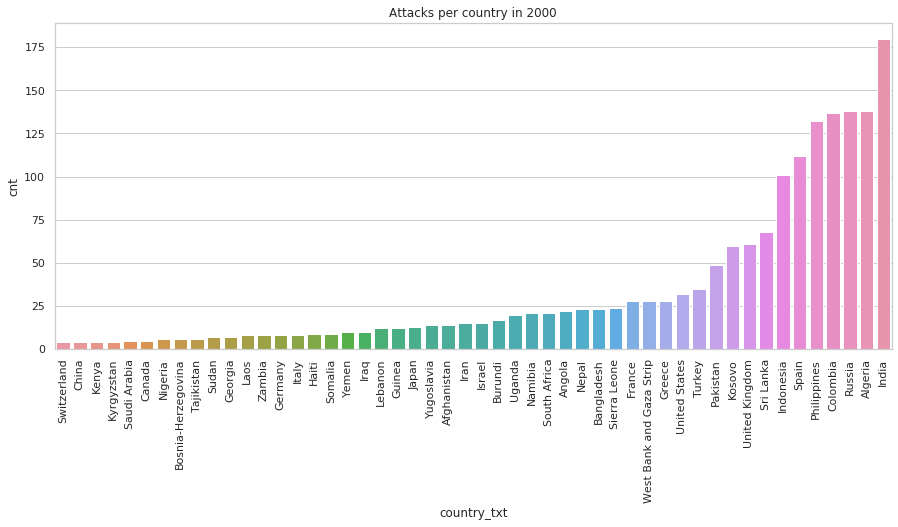

In [49]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(x="country_txt", y="cnt", data=events2000[-50:])
ax.set_title('Attacks per country in 2000')
plt.xticks(rotation=90)